# Phase 2 project

# Business Understanding

### Problem Statement
New real estate developers are planning to build new housing facilities and there has been a problem in evaluating homes in King County

### Objectives:
1. To develop a model that will help in identifying the attributes that bring more value to the houses, hence bringing maximum profit. Specifically, to uncover:
>>Which features have the biggest impact on the sale price of a house?<br>
>>How much does location affect the sale price of a house?
2. To create a regression model to advice developers on how to accurately price a property

### Importing the data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')
data = pd.read_csv('data/kc_house_data.csv')

data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [2]:
# grouping bedrooms
x = data.groupby(['bedrooms'])[['price']].mean()

### Data Understanding
Here we will explore the data to get a better understanding of its state, then decide on the steps we need to take to clean it. We will begin by defining some helper functions for the following tasks:
- getting the shape of the data
- getting data info
- simple check for missing data
- duplicates
- descriptive stats

We will then group together the helper function under a new function that explores the data for the above attributes

In [3]:
# helper function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [4]:
# helper function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [5]:
# helper function to check for missing values

def data_missing(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [6]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [7]:
# helper function to check for duplicates on the ID column

def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [8]:
# helper function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out

In [9]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = unique_column_duplicates(data, 'id')
    out6 = data_describe(data)
    
    return out1, out2, out3, out4, out5

From below, data has:
- 21597 houses sold
- 21 house features : 6 string variables and 15 numeric variables. `date` column is encoded as string instead of datetime, while `sqft_basement` is enconded as string instead of float. These 2 will be corrected
- Missing values which will be investigated and treated
- No duplicates. However, the `id` column which should contain unique identifiers has 177 duplicated values. These will be checked
- From the descriptive stats, there's also potential for some outliers which will need to be veried. e.g. having max 33 bedrooms

Looking at the `date` column which shows sale date, we will extract the month to see if there is a seasonality sale of houses i.e do houses sale more during some months than others?

We will also use the `zipcode` or `lat` & `long` columns to split the locations into the 4 regions of King County namely : North, East, Seattle & South. We will use this to investigate whether location is a factor in house sales i.e. is there a variation in house prices by location?

In [10]:
explore(data)

The DataFrame has:
	* 21597 rows
	* 21 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  l

(None, None, None, None, None)

### Data Preparation

#### Change floors from float to int

In [11]:
# change float to int
data['floors'] = data['floors'].astype(int)

#### Cleaning date column
Here we will change the `date` column to string, and then create a new column `month_sold` extracting the sale month from the date column. From the plot below, we see that there is a seasonality trend to house sales. To simplify analysis, we will group the month column into 4 quarters: Q1 (1, 2, 3), Q2 (4, 5, 6), Q3 (7, 8, 9), Q4 (10, 11, 12)

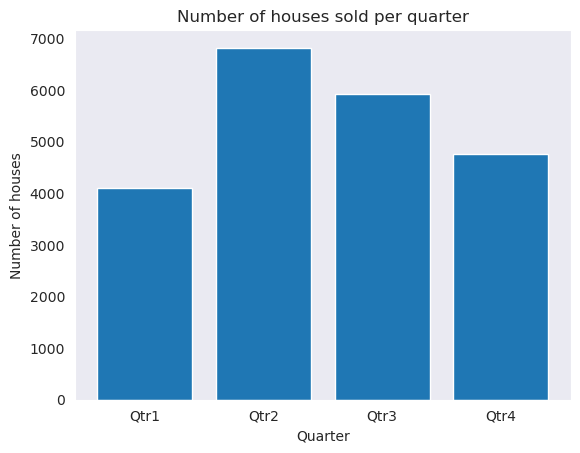

In [12]:
# transform and extract month
data['date'] = pd.to_datetime(data['date'])
data['month_sold'] = data.date.dt.month

# change month to quarters
Q1 = {1: 'Qtr1', 2: 'Qtr1', 3: 'Qtr1'}
Q2 = {4: 'Qtr2', 5: 'Qtr2', 6: 'Qtr2'}
Q3 = {7: 'Qtr3', 8: 'Qtr3', 9: 'Qtr3'}
Q4 = {10: 'Qtr4', 11: 'Qtr4', 12: 'Qtr4'}
quarters = {**Q1, **Q2, **Q3, **Q4}
data['month_sold'] = data['month_sold'].replace(quarters)

a = data.month_sold.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of houses');

#### Cleaning sqft_basement column
This column is coded as string, yet it should be float. We change that below. We also discover that the column contains missing values encoded as '?'. Since this accounts for only 2.1% of the data, we can drop them

In [13]:
# inspect columns
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')
a1 = data.sqft_basement.value_counts(normalize=True)[1]

def check_qn(data):
    """check for ? in data"""
    for col in data.columns:
        if ('?' in data[col].unique()) == True:
            out = print(f'{col} contains "?". This is {round(a1*100, 2)}% of the data')
            return out
        
check_qn(data)

sqft_basement col is encoded as object
sqft_basement contains "?". This is 2.1% of the data


In [14]:
# since the missing values are insignifcantly small, we drop them
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', np.nan))
data = data.dropna(subset=['sqft_basement'])

# check again for ?
print('"?" in sqft_basement: ','?' in data['sqft_basement'].unique())

#check dtype
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')

"?" in sqft_basement:  False
sqft_basement col is encoded as float64


#### Missing values
We have missing values below, however, since these columns will not be used in the analysis. We will not treat the missing data as the columns will be dropped later on

In [15]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = ((data.isnull().sum() / len(data))*100).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(data)
missing_data

Missing Values  Percentage(%)
yr_renovated            3754      17.755285
waterfront              2339      11.062763
view                      61       0.288512

In [16]:

#function to fill missing values
def fill_missing_values(data):
    # Fill missing values in "view" with "NONE"
    data["view"].fillna("NONE", inplace=True)

    # Fill missing values in "waterfront" with mode
    mode_waterfront = data["waterfront"].mode()[0]
    data["waterfront"].fillna(mode_waterfront, inplace=True)

    # Fill missing values in "yr_renovated" with mode
    mode_yr_renovated = data["yr_renovated"].mode()[0]
    data["yr_renovated"].fillna(mode_yr_renovated, inplace=True)

    return data

fill_missing_values(data)

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  \
0          5650       1         NO  NONE  ...       1180           0.0   
1          7242       2         NO  NONE  ...       2170         400.0   
2         10000       1         NO  NONE  ...        770           0.0   
3          5000       1         NO  NONE  ...       1050         910.0   
4          8080       1         NO  NONE  ...       1680           0.0   
...         ...     ...        ...   ...  ...        ...           ...   
21592      1131       3         NO  NONE  ...       1530           0.0   
21593      5813       2         NO  NONE  ...       2310           0.0   
21594      1350       2         NO  NONE  ...       1020           0.0   
21595      2388       2         NO  NONE  ...       1600           0.0   
21596      1076       2         NO  NONE  ...       1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  month_sold  
0            5650        Qtr4  
1            7639        Qtr4  
2            8062        Qtr1  
3            5000        Qtr4  
4            7503        Qtr1  
...           ...         ...  
21592        1509        Qtr2  
21593        7200        Qtr1  
21594        2007        Qtr2  
21595        1287        Qtr1  
21596        1357        Qtr4  

[21143 rows x 22 columns]

In [17]:
missing_values(data)

Empty DataFrame
Columns: [Missing Values, Percentage(%)]
Index: []

#### Duplicated Id Column
Id column duplicates to be dropped in the process below

In [18]:
print(identify_duplicates(data))
print(unique_column_duplicates(data, 'id'))

The Data has no duplicates 

None
The column Id has 173 duplicated rows.
This constitutes 0.818% of the data set. 

None


In [19]:
def drop_duplicates(df, column):
    """function to drop duplicated rows"""
    
    df.drop_duplicates(subset=column, keep='first', inplace=True)
    confirmation = unique_column_duplicates(data, 'id')
    return confirmation

drop_duplicates(data, 'id')

The column Id has no duplicates 



#### Outliers **to be completed**
We will focus on the columns specified below, which we have chosen for the modelling to check outliers

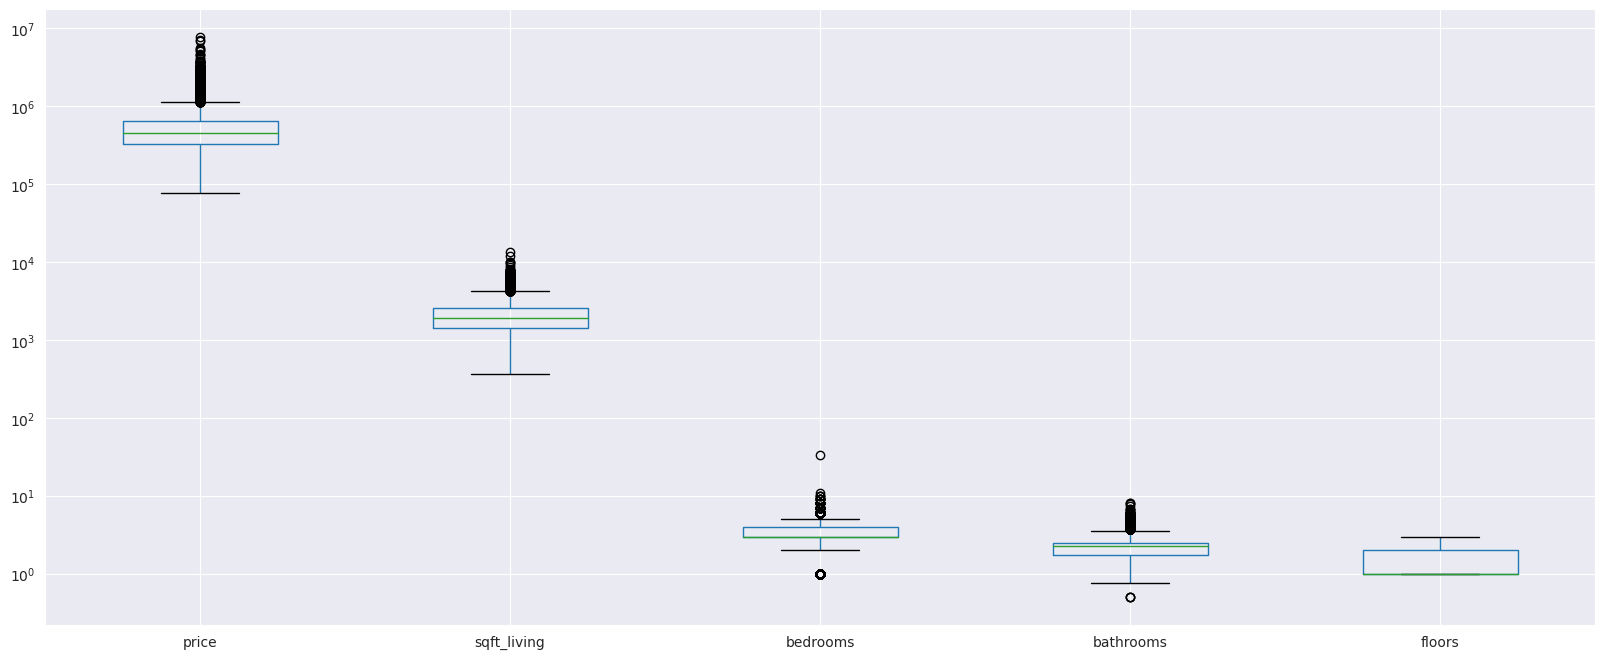

In [20]:
# visualize data to assess outliers

columns = ['price', 'sqft_living', 'bedrooms','bathrooms', 'floors']
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [21]:
# Define the columns to check for outliers
columns = ['bedrooms', 'bathrooms', 'price', 'sqft_living', 'floors']

print("Summary statistics before removing outliers:")
print(data[columns].describe())

# Calculate the IQR for each column
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from each column
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  20970.000000  20970.000000  2.097000e+04  20970.000000  20970.000000
mean       3.373343      2.118693  5.409766e+05   2083.747592      1.447639
std        0.924136      0.768475  3.686345e+05    919.294297      0.551640
min        1.000000      0.500000  7.800000e+04    370.000000      1.000000
25%        3.000000      1.750000  3.225000e+05   1430.000000      1.000000
50%        3.000000      2.250000  4.500000e+05   1920.000000      1.000000
75%        4.000000      2.500000  6.450000e+05   2550.000000      2.000000
max       33.000000      8.000000  7.700000e+06  13540.000000      3.000000

Summary statistics after removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  19106.000000  19106.000000  1.910600e+04  19106.000000  19106.000000
mean       3.298440      2.026052  4.715314e+05   1943.632262      1.42609

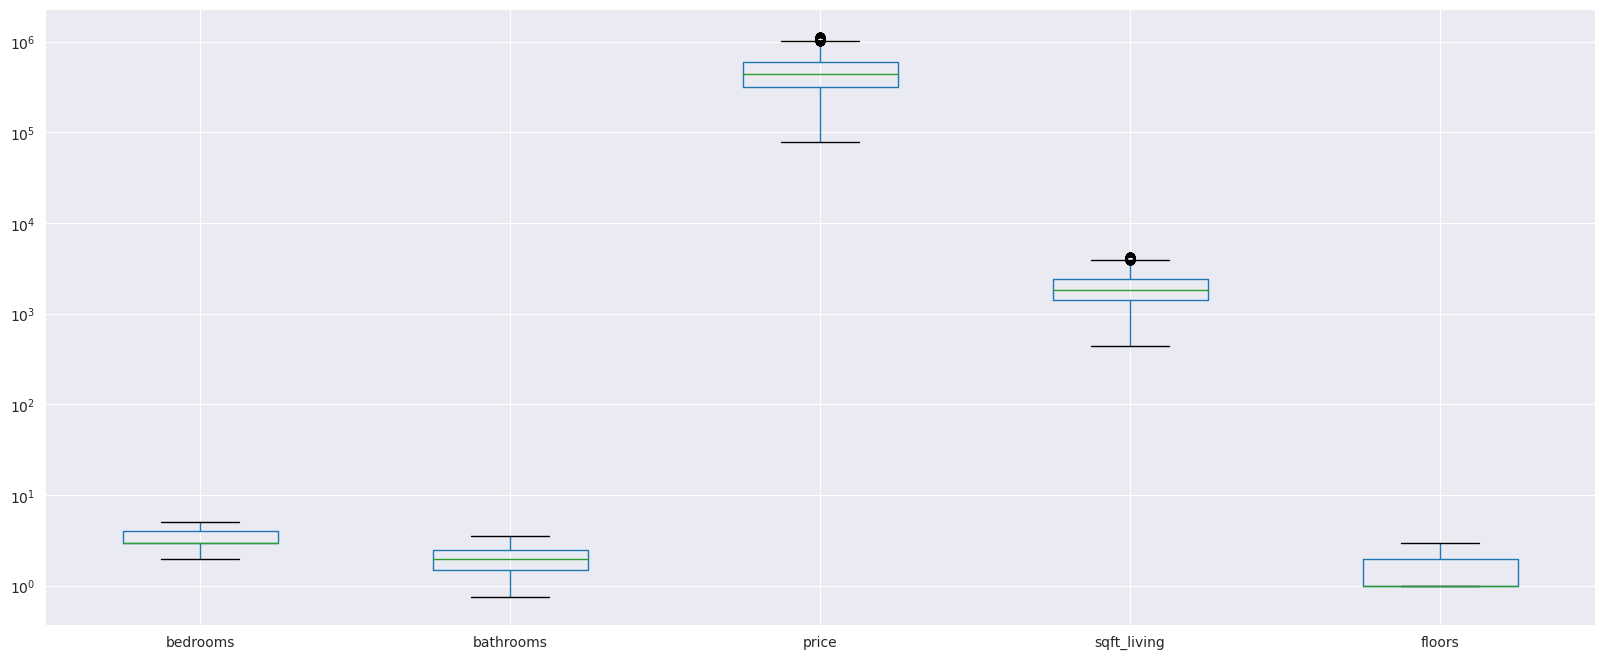

In [22]:
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

#### Turning Zipcodes into Regions
The code below turns zip codes into the regions for King County. 

In [2]:
# Determine the minimum and maximum latitude and longitude values in the dataset
min_lat = data['lat'].min()
max_lat = data['lat'].max()
min_long = data['long'].min()
max_long = data['long'].max()
# Define the latitude and longitude ranges for each of the four regions
north_lat = max_lat - (max_lat - min_lat) / 2
east_long = min_long + (max_long - min_long) / 2
south_lat = min_lat + (max_lat - min_lat) / 2
# Assign each data point to one of the four regions based on its latitude and longitude values
data['region'] = ''
data.loc[(data['lat'] >= north_lat) & (data['long'] <= east_long), 'region'] = 'Northwest'
data.loc[(data['lat'] >= north_lat) & (data['long'] > east_long), 'region'] = 'Northeast'
data.loc[(data['lat'] < south_lat) & (data['long'] <= east_long), 'region'] = 'Southwest'
data.loc[(data['lat'] < south_lat) & (data['long'] > east_long), 'region'] = 'Southeast'

### folium map

In [3]:
# visualize the different regions
import folium
from IPython.display import display
from folium.plugins import MarkerCluster
# create a list of coordinates
latlon = list(zip(data.lat, data.long))
# create a map with the Stamen Terrain tileset
base_map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=9, tiles='Stamen Terrain')
# add the markers to the map
marker_cluster = MarkerCluster().add_to(base_map)
for coord in latlon:
    folium.Marker(location=[coord[0], coord[1]], icon=None).add_to(marker_cluster)
display(base_map)

# Explolatory Data Analysis
We will explore the following areas to set context for the presentation
- Average Price of property based on number of bedrooms
- Average Price of property based on the condition of the property
- Regions (North, East, Seattle & South)
- Price distribution
- Houses Sold Per Quarter


### Average Price of property based on number of bedrooms
* As the bedrooms increase, price increases, upto 8 bedrooms. 
* Afterwards the price decreases.


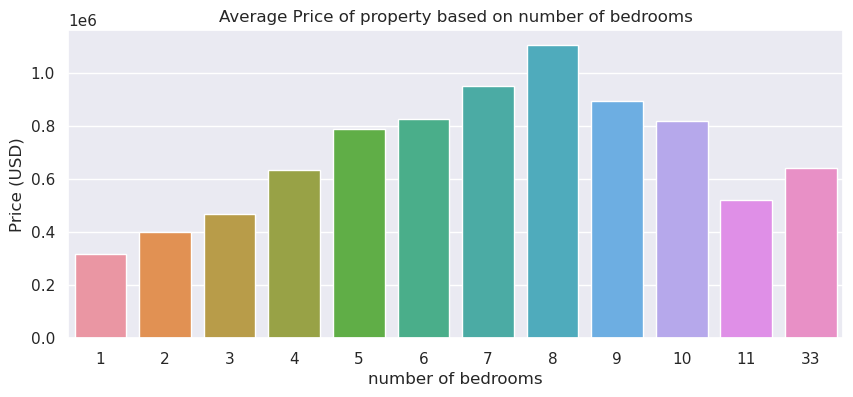

In [25]:
# plot the output 
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x, 
           x=x.index, 
           y='price').set(title='Average Price of property based on number of bedrooms',
                                  xlabel='number of bedrooms', ylabel='Price (USD)');

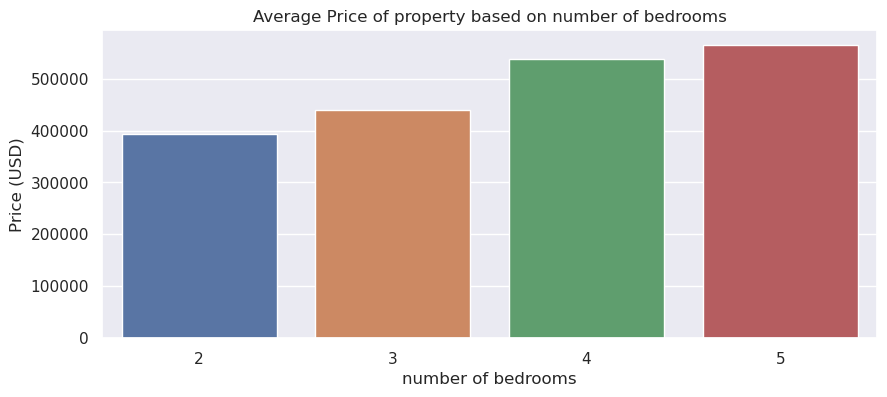

In [26]:
# lets see price against bedrooms
bed_df = data[['bedrooms', 'price']]
bed_df2 = bed_df.groupby(['bedrooms'])[['price']].mean()

# plot the output 
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=bed_df2, 
           x=bed_df2.index, 
           y='price').set(title='Average Price of property based on number of bedrooms',
                                  xlabel='number of bedrooms', ylabel='Price (USD)');

### Average Price of property based on the condition of the property
As the condition of the house improves, price increases - houses with a very good condition have higher prices. Thus keeping property in a good condition will higher valuation

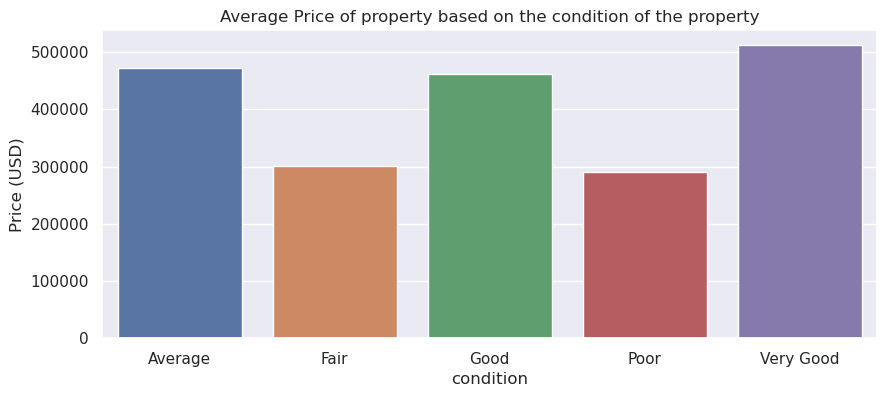

In [27]:
# lets see price of against bedrooms
condition_df = data[['condition', 'price']]
condition_df2 = condition_df.groupby(['condition'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=condition_df2, 
           x=condition_df2.index, 
           y='price').set(title='Average Price of property based on the condition of the property',
                                  xlabel='condition', ylabel='Price (USD)');

### Price Distribution
Price is almost normally distributed, with a positve skew. There are more lower priced houses, than highly priced houses.

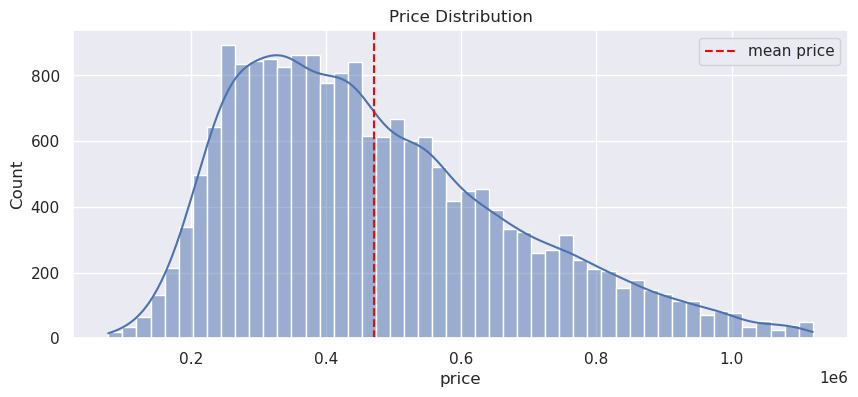

In [28]:
sns.histplot(data.price, kde=True)
plt.title('Price Distribution')
plt.axvline(x=data.price.mean(), label='mean price', linestyle='--', color='red')
plt.legend();

### Houses Sold Per Quarter
Houses sold in quarter 2 have the highest price - trend shows seasonality of house sales

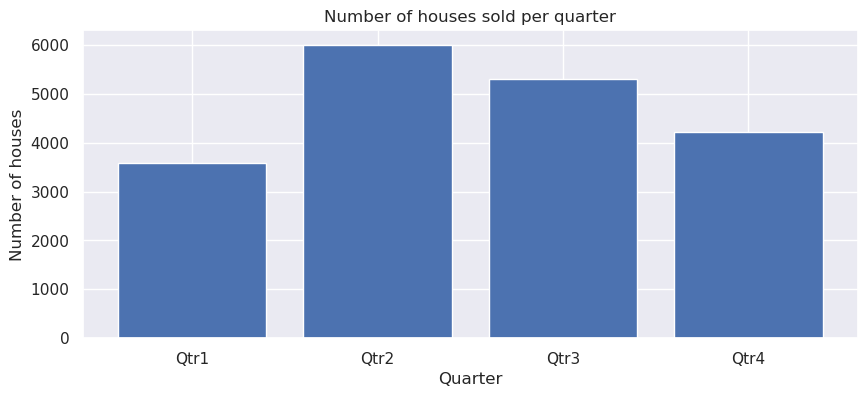

In [29]:
a = data.month_sold.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of houses');

### Houses Sold Per Region
Majority of houses are sold in the NorthWest and SouthWest regions - making them ideal locations for developing property

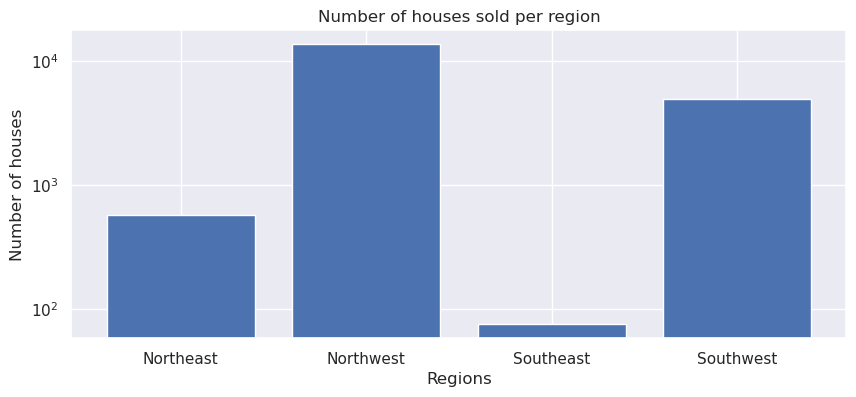

In [30]:
# visaulize houses sold regionally
a = data.region.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per region')
plt.xlabel('Regions')
plt.ylabel('Number of houses')
plt.yscale('log');

# Modelling


In [31]:
#creating a matrix to check correlation of the different columns  and storing it in corr_matrix
# the matrix will help us identfy which columns have the highest and lowest correlation with price
corr_matrix= data.corr()
corr_matrix

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.015135  0.016616   0.034731     0.016772 -0.130394   
price          0.015135  1.000000  0.274690   0.421374     0.602168  0.079732   
bedrooms       0.016616  0.274690  1.000000   0.469553     0.589332  0.019679   
bathrooms      0.034731  0.421374  0.469553   1.000000     0.690325  0.047827   
sqft_living    0.016772  0.602168  0.589332   0.690325     1.000000  0.138520   
sqft_lot      -0.130394  0.079732  0.019679   0.047827     0.138520  1.000000   
floors         0.034496  0.230469  0.131108   0.532462     0.333412 -0.031858   
sqft_above     0.021584  0.500525  0.466446   0.609172     0.842568  0.147151   
sqft_basement -0.007292  0.217201  0.253434   0.187261     0.340865 -0.005913   
yr_built       0.030090  0.040955  0.175322   0.567630     0.354732  0.035677   
yr_renovated  -0.007312  0.084315 -0.008797   0.013293     0.015402  0.006399   
zipcode       -0.011717 -0.008629 -0.164037  -0.214504    -0.205708 -0.124305   
lat           -0.000311  0.441134 -0.048682  -0.016260     0.008123 -0.096278   
long           0.024306  0.058221  0.161532   0.252868     0.286447  0.214265   
sqft_living15  0.017120  0.543671  0.395160   0.515735     0.736994  0.132657   
sqft_lot15    -0.143371  0.069861  0.018214   0.049552     0.156016  0.690255   

                 floors  sqft_above  sqft_basement  yr_built  yr_renovated  \
id             0.034496    0.021584      -0.007292  0.030090     -0.007312   
price          0.230469    0.500525       0.217201  0.040955      0.084315   
bedrooms       0.131108    0.466446       0.253434  0.175322     -0.008797   
bathrooms      0.532462    0.609172       0.187261  0.567630      0.013293   
sqft_living    0.333412    0.842568       0.340865  0.354732      0.015402   
sqft_lot      -0.031858    0.147151      -0.005913  0.035677      0.006399   
floors         1.000000    0.522153      -0.307423  0.602583     -0.023488   
sqft_above     0.522153    1.000000      -0.219132  0.467050     -0.008093   
sqft_basement -0.307423   -0.219132       1.000000 -0.172616      0.042029   
yr_built       0.602583    0.467050      -0.172616  1.000000     -0.194614   
yr_renovated  -0.023488   -0.008093       0.042029 -0.194614      1.000000   
zipcode       -0.097505   -0.274121       0.105824 -0.341655      0.067245   
lat            0.015620   -0.050492       0.102851 -0.157465      0.024690   
long           0.162828    0.393810      -0.168479  0.405702     -0.056158   
sqft_living15  0.276676    0.710270       0.095338  0.351977     -0.032054   
sqft_lot15    -0.036578    0.165657      -0.006522  0.057297      0.006181   

                zipcode       lat      long  sqft_living15  sqft_lot15  
id            -0.011717 -0.000311  0.024306       0.017120   -0.143371  
price         -0.008629  0.441134  0.058221       0.543671    0.069861  
bedrooms      -0.164037 -0.048682  0.161532       0.395160    0.018214  
bathrooms     -0.214504 -0.016260  0.252868       0.515735    0.049552  
sqft_living   -0.205708  0.008123  0.286447       0.736994    0.156016  
sqft_lot      -0.124305 -0.096278  0.214265       0.132657    0.690255  
floors        -0.097505  0.015620  0.162828       0.276676   -0.036578  
sqft_above    -0.274121 -0.050492  0.393810       0.710270    0.165657  
sqft_basement  0.105824  0.102851 -0.168479       0.095338   -0.006522  
yr_built      -0.341655 -0.157465  0.405702       0.351977    0.057297  
yr_renovated   0.067245  0.024690 -0.056158      -0.032054    0.006181  
zipcode        1.000000  0.279507 -0.563194      -0.282064   -0.144812  
lat            0.279507  1.000000 -0.135541       0.018737   -0.099822  
long          -0.563194 -0.135541  1.000000       0.365315    0.246150  
sqft_living15 -0.282064  0.018737  0.365315       1.000000    0.173800  
sqft_lot15    -0.144812 -0.099822  0.246150       0.173800    1.000000

In [32]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.602168
sqft_living15    0.543671
sqft_above       0.500525
lat              0.441134
bathrooms        0.421374
bedrooms         0.274690
floors           0.230469
sqft_basement    0.217201
yr_renovated     0.084315
sqft_lot         0.079732
sqft_lot15       0.069861
long             0.058221
yr_built         0.040955
id               0.015135
zipcode         -0.008629
Name: price, dtype: float64

##### Baseline Model
From the correlation analysis, the column `sqft_living` has the strongest correlation to price. We will build our baseline model with this variable. The scatter plot below shows a linear relationship between our predictor and target variable, thus a good candidate for the baseline model

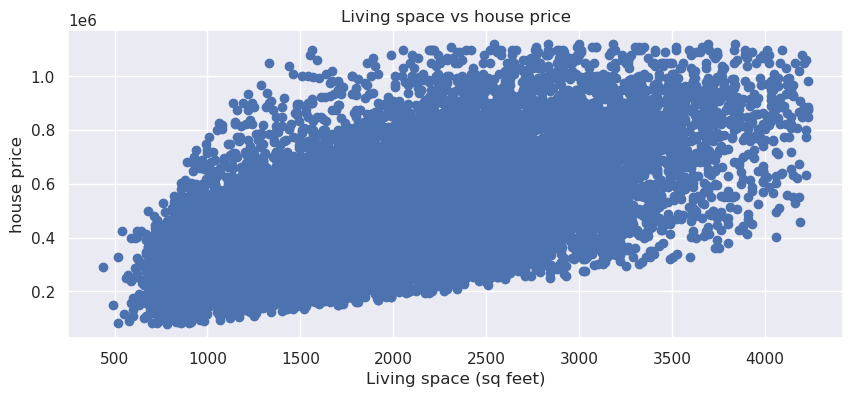

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living', y='price', data=data)
ax.set_xlabel('Living space (sq feet)')
ax.set_ylabel('house price')
ax.set_title('Living space vs house price');

We then build the baseline model using the code below

In [34]:
# function for ols regression
def reg_model(X, y):
    """Function to create regression model
    & display summary"""
    model = sm.OLS(y, sm.add_constant(X)).fit()
    results = model.summary()
    return results

In [35]:
import statsmodels.api as sm
#selecting columns for our simple linear regression
y = data['price']
X = data['sqft_living']
#creating a linear regression and fitting data into it
results_baseline = reg_model(X, y)
results_baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:02:29   Log-Likelihood:            -2.5627e+05
No. Observations:               19106   AIC:                         5.125e+05
Df Residuals:                   19104   BIC:                         5.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.386e+05   3401.496     40.745      0.000    1.32e+05    1.45e+05
sqft_living   171.2969      1.643    104.250      0.000     168.076     174.518
==============================================================================
Omnibus:                      920.239   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.149
Skew:                           0.565   Prob(JB):                    2.77e-230
Kurtosis:                       3.226   Cond. No.                     6.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above results:
* The model is statistically significant. 
* The model explains about <b>36.3%</b> of the variance in house prices

* Both the intercept and the target variable p-values show that the coefficients are statistically significant.

* An increase of 1 sq foot in `sqft_living` will result in an increase in house price by <b>USD 171.29</b>
* When `sqft_living` is zero, the house price will be <b>USD 138600</b>

#### We explored standardization of baseline model
Standardization below did not improve the r2 of the model. Thus we don't explore it in the mutiple regression. We will explore other ways of tuning the model

In [36]:
# standardize baseline model
X_mean = data['sqft_living'].mean()
X_std = data['sqft_living'].std()
X_standardized = (X - X_mean) / X_std

results_baseline_stdized = reg_model(X_standardized, y)
results_baseline_stdized

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:02:29   Log-Likelihood:            -2.5627e+05
No. Observations:               19106   AIC:                         5.125e+05
Df Residuals:                   19104   BIC:                         5.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.715e+05   1170.783    402.749      0.000    4.69e+05    4.74e+05
sqft_living  1.221e+05   1170.813    104.250      0.000     1.2e+05    1.24e+05
==============================================================================
Omnibus:                      920.239   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.149
Skew:                           0.565   Prob(JB):                    2.77e-230
Kurtosis:                       3.226   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above results:

* The model is statistically significant. The column sqft_living explains <b>36.3%</b> of the variance in house prices

* Both the intercept and the target variable p-values show that the coefficients are statistically significant.

* An increase of 1 sq foot in sqft_living will result in an increase in house price by <b>USD 122100</b>

* When sqft_living is zero, the house price will be <b>USD 471500.0</b>

### Success Metrics 
We will use RSQUARED and MAE to meet 2 objectives:
- Rsquared will help us asses model improvements in prediction variation in house prices
- mean absolute error will help us to measure the distance of the predicted prices from the actual prices. From the code below, we have chosen mae over rmse because it is less infuenced by outliers

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# function to check mean absolute error and RMSE

def error_fun(data, colx, coly):
    """Function to calculate mae"""
    
    #reshape columns
    X = data[colx].values.reshape(-1,1)
    y = data[coly].values.reshape(-1,1)
    
    # fit reg model
    regressor = LinearRegression()
    regressor.fit(X,y)
    
    # calculate errors
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = (mean_squared_error(y, y_pred))**0.5
    
    return mae, rmse

mae, rmse = error_fun(data, 'sqft_living', 'price')

#findning the coeefficient of the regression
print( f'mae : {mae}')

#finding the y intercept of the regression
print( f'rmse : {rmse}')

mae : 130224.67018401195
rmse : 161822.32195752443


* From the results above the MAE gives the difference between the predicted value (price) and the actual value (mean price).


### First Multiple Regression model
For our first multiple regression model we begin with the numerical variables, then as we proceed we add categorical variables.

In [38]:
#selecting columns for our simple linear regression
X_first_mult = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
#creating a linear regression and fitting data into it
First_model = reg_model(X_first_mult, y)
First_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     2842.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:02:36   Log-Likelihood:            -2.5611e+05
No. Observations:               19106   AIC:                         5.122e+05
Df Residuals:                   19101   BIC:                         5.123e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.934e+05   5615.542     34.433      0.000    1.82e+05    2.04e+05
bedrooms    -3.174e+04   1872.788    -16.948      0.000   -3.54e+04   -2.81e+04
bathrooms    4345.9659   2741.965      1.585      0.113   -1028.527    9720.459
sqft_living   187.1479      2.476     75.580      0.000     182.294     192.001
floors       7229.6064   2529.592      2.858      0.004    2271.383    1.22e+04
==============================================================================
Omnibus:                     1019.674   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.069
Skew:                           0.590   Prob(JB):                    1.40e-259
Kurtosis:                       3.326   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Interpretation</h3>

From the above results:

* At an alpha of 0.05 the model is statistically significant. 
* The model explains about <b>37.3%</b> of the variance in price.
* Both the intercept and the target variable p-values show that the coefficients are statistically significant.
* An increase of 1 sq foot in sqft_living will result in an increase in house price by USD 187.14
* An increase in 1 bedroom results in a decrease in price by USD 31740
* An increase in 1 bathroom results in an increase in price by USD 4345.96
* For every floor added there is an increase in price by USD 7229.60
* Controlling for all other variables, the price of the house is USD 193400.0

* From the R-squared and the coefficient values, this model is better than the baseline model.

### Function to calculate errors for multiple columns

In [39]:
# function to calculate errors for multiple columns
def error_multix(data, colx, coly):
    """Function to calculate mae for 
    multiple X columns"""
    
    #reshape columns
    X = data[colx].values.reshape(-1,len(colx))
    y = data[coly].values.reshape(-1,1)
    
    # fit reg model
    regressor = LinearRegression()
    regressor.fit(X,y)
    
    # calculate errors
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = (mean_squared_error(y, y_pred))**0.5
    
    return mae, rmse

In [40]:
# mae for first multiple model
X1 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
mae_first_mult, rmse_first_mult = error_multix(data, X1, 'price')

#findning the coeefficient of the regression
print( f'mae : {mae_first_mult}')


mae : 128531.47151055187


<h3>interpretation</h3>

* From the results above the MAE gives the difference between the predicted value (price) and the actual value (mean price)
* Compared to the baseline model, there is a decrease in MAE, meaning this model makes better prediction of the target.

### One Hot Encode Categorial Variables For Modelling
For the next step, we will one-hot-encode the following categorical variables for modelling
- `quarters` column: we transformed the date to month, then combined to quarters
- `condition` column with ratings of house condition
- `regions` column: we transfored zipcode to the 4 regions of King County

In [41]:
# Function to one hot encode categorical variables
def categorical_ohe(data, col):
    ohe = pd.get_dummies(data[col], drop_first=True)
    return ohe

# compute ohe for the 3 columns
quarters_ohe =  categorical_ohe(data, 'month_sold')
condition_ohe =  categorical_ohe(data, 'condition')
region_ohe =  categorical_ohe(data, 'region')

# merge the ohe columns with the original data
data_list = [data, quarters_ohe, condition_ohe, region_ohe]
data_ohe = pd.concat(data_list, axis=1)

### Second Multiple Regression model
In this second model we will combine model_1 columns plus the above encoded categorical variables: `months_sold`, `condition` & `region`  

In [42]:
# defining predictor variables
X_multi_second = data_ohe[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']]
Second_model = reg_model(X_multi_second, y)
Second_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1960.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:            -2.5206e+05
No. Observations:               19106   AIC:                         5.042e+05
Df Residuals:                   19091   BIC:                         5.043e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.841e+04   7508.043     13.108      0.000    8.37e+04    1.13e+05
bedrooms     -2.59e+04   1521.323    -17.022      0.000   -2.89e+04   -2.29e+04
bathrooms    1.469e+04   2228.625      6.590      0.000    1.03e+04    1.91e+04
sqft_living   179.0673      2.010     89.080      0.000     175.127     183.007
floors       1.463e+04   2139.473      6.839      0.000    1.04e+04    1.88e+04
Qtr2         4374.8836   2743.960      1.594      0.111   -1003.521    9753.288
Qtr3        -9987.6335   2812.502     -3.551      0.000   -1.55e+04   -4474.882
Qtr4        -1.369e+04   2951.776     -4.639      0.000   -1.95e+04   -7908.703
Fair        -4.627e+04   1.09e+04     -4.243      0.000   -6.76e+04   -2.49e+04
Good         3.818e+04   2293.713     16.647      0.000    3.37e+04    4.27e+04
Poor        -7.279e+04   2.78e+04     -2.623      0.009   -1.27e+05   -1.84e+04
Very Good     6.46e+04   3693.883     17.489      0.000    5.74e+04    7.18e+04
Northwest    1.073e+05   5577.243     19.239      0.000    9.64e+04    1.18e+05
Southeast    -1.69e+04   1.59e+04     -1.065      0.287    -4.8e+04    1.42e+04
Southwest   -1.029e+05   5780.962    -17.802      0.000   -1.14e+05   -9.16e+04
==============================================================================
Omnibus:                     1583.742   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2615.878
Skew:                           0.621   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Interpretation</h3>

From the above results:


* At an alpha of 0.05 the model is statistically significant.
* The model explains about <b>59%</b> of the variance in price.
* Both the intercept and the target variable p-values show that the coefficients are statistically significant.

Holding all other variables constant:
* An increase of 1 sq foot in sqft_living will result in an increase in house price by USD 179.06
* An increase in 1 bedroom results in a decrease in price by USD 25900.0
* An increase in 1 bathroom results in an increase in price by USD 14690.0
* For every floor added there is an increase in price by USD 14630.0
* Controlling for all other variables, the price of the house is USD 98410.0
* In reference to Qr1, Qr2 has an associated increase in price of about USD 4374.88
* In reference to Qr1, Qr3 has an associated decrease in price of about USD 9987.63
* In reference to Qr1, Qr4 has an associated decrease in price of about USD 13690.0
* In reference to Average condition, Fair condition has an associated decrease in price of about USD 46270.0
* In reference to Average condition, Good condition has an associated increase in price of about USD 38180.0
* In reference to Average condition, Poor condition has an associated decrease in price of about USD 72790.0
* In reference to Average condition, very good condition has an associated increase in price of about USD 64600.0
* In reference to North east region, north west has an associated increase in price of about USD 107300.0
* In reference to North east region, south east has an associated decrease in price of about USD 16900.0
* In reference to North east region, south west has an associated decrease in price of about USD 102900.0

* From the R-squared and the coefficient values, this model is better than the baseline model, the first multiple regression model.

In [43]:
# mae for second multiple model
X2 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']

mae_second_mult, rmse_second_mult = error_multix(data_ohe, X2, 'price')

#findning the coeefficient of the regression
print( f'mae for second multiple model : {mae_second_mult}')


mae for second multiple model : 97193.09849811278


<h3>interpretation</h3>

* From the results above the MAE gives the difference between the predicted value (price) and the actual value (mean price)
* Compared to the baseline model and first multiple model, there is a decrease in MAE, meaning this model makes better prediction of the target.

### Third Mutiple Regression Model
We will explore adding <b>view</b> column to the model to improve accuracy. Below we will one hot econde, merge, then fit the third model.

In [44]:
# one hot encode view column and concatenate 
view_ohe =  categorical_ohe(data_ohe, 'view')
list_concat = [data_ohe, view_ohe]
data_ohe2 = pd.concat(list_concat, axis=1)

In [45]:
# defining predictor variables
X_multi_third = data_ohe2[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest', 
                           'EXCELLENT', 'FAIR', 'GOOD', 'NONE']]
Third_model = reg_model(X_multi_third, y)
Third_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1643.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:02:38   Log-Likelihood:            -2.5164e+05
No. Observations:               19106   AIC:                         5.033e+05
Df Residuals:                   19087   BIC:                         5.035e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.715e+05   8627.201     19.880      0.000    1.55e+05    1.88e+05
bedrooms    -2.214e+04   1493.563    -14.825      0.000   -2.51e+04   -1.92e+04
bathrooms    1.404e+04   2179.981      6.443      0.000    9771.708    1.83e+04
sqft_living   169.8137      1.992     85.248      0.000     165.909     173.718
floors       1.917e+04   2099.373      9.131      0.000    1.51e+04    2.33e+04
Qtr2         4734.6413   2683.645      1.764      0.078    -525.540    9994.823
Qtr3        -9589.7486   2750.944     -3.486      0.000    -1.5e+04   -4197.656
Qtr4        -1.372e+04   2886.757     -4.751      0.000   -1.94e+04   -8057.201
Fair        -4.469e+04   1.07e+04     -4.190      0.000   -6.56e+04   -2.38e+04
Good         3.612e+04   2244.257     16.097      0.000    3.17e+04    4.05e+04
Poor        -8.299e+04   2.71e+04     -3.057      0.002   -1.36e+05   -2.98e+04
Very Good    6.248e+04   3613.383     17.293      0.000    5.54e+04    6.96e+04
Northwest    1.076e+05   5457.399     19.711      0.000    9.69e+04    1.18e+05
Southeast    -1.54e+04   1.55e+04     -0.992      0.321   -4.58e+04     1.5e+04
Southwest   -1.019e+05   5657.222    -18.016      0.000   -1.13e+05   -9.08e+04
EXCELLENT    1.391e+05   1.24e+04     11.178      0.000    1.15e+05    1.63e+05
FAIR         4415.2982   9185.920      0.481      0.631   -1.36e+04    2.24e+04
GOOD         2.421e+04   8616.336      2.809      0.005    7317.482    4.11e+04
NONE        -7.989e+04   4852.572    -16.464      0.000   -8.94e+04   -7.04e+04
==============================================================================
Omnibus:                     1437.688   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2450.536
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                       4.341   Cond. No.                     6.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Interpretation</h3>

From the above results:

* At an alpha of 0.05 the model is statistically significant.
* The model explains about <b>60.8%</b> of the variance in price.
* Both the intercept and the target variable p-values show that the coefficients are statistically significant.

Holding all other variables constant:
* An increase of 1 sq foot in sqft_living will result in an increase in house price by USD 170 
* An increase in 1 bedroom results in a decrease in price by USD 22140.0
* An increase in 1 bathroom results in an increase in price by USD 14040.0
* For every floor added there is an increase in price by USD 191710.0
* Controlling for all other variables, the price of the house is USD 1715000.0
* In reference to Qr1, Qr2 has an associated increase in price of about USD 4735
* In reference to Qr1, Qr3 has an associated decrease in price of about USD 9590
* In reference to Qr1, Qr4 has an associated decrease in price of about USD 13720.0
* In reference to Average condition, Fair condition has an associated decrease in price of about USD 44690.0 
* In reference to Average condition, Good condition has an associated increase in price of about USD 36120=0.0
* In reference to Average condition, Poor condition has an associated decrease in price of about USD 82990.0
* In reference to Average condition, very good condition has an associated increase in price of about USD 62480.0
* In reference to North east region, north west has an associated increase in price of about USD 107600.0
* In reference to North east region, south east has an associated decrease in price of about USD 15400.0
* In reference to North east region, south west has an associated decrease in price of about USD 101900.0

* In reference to Average view, EXCELLENT view has an associated increase in price of about USD 139100.0
* In reference to Average view, FAIR view has an associated increase in price of about USD 4415.11
* In reference to Average view, GOOD view has an associated increase in price of about USD 24200.0
* In reference to Average view, NONE view has an associated decrease in price of about USD 79890.0

* From the R-squared and the coefficient values, this model is better than the baseline model, the first multiple regression model and the second multiple model.

In [46]:
# mae for third multiple model
X3 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 
      'Southwest', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

mae_third_mult, rmse_third_mult = error_multix(data_ohe2, X3, 'price')

#findning the coeefficient of the regression
print( f'mae for third multiple model : {mae_third_mult}')

mae for third multiple model : 95121.58576864422


<h3>interpretation</h3>

* From the results above the MAE gives the difference between the predicted value (price) and the actual value (mean price)
* Compared to the baseline model, first multiple model,second multiple model, there is a decrease in MAE, meaning this model makes better prediction of the target.

#### Check for Multicollinearity
Below we do a correlation matrix for all predictor variables. bathrooms and square foot living are highly correlated. In our fourth model, we take out bathrooms to address this

In [47]:
X_multi_third.corr()

bedrooms  bathrooms  sqft_living    floors      Qtr2      Qtr3  \
bedrooms     1.000000   0.469553     0.589332  0.131108  0.003128  0.005490   
bathrooms    0.469553   1.000000     0.690325  0.532462  0.009323  0.017551   
sqft_living  0.589332   0.690325     1.000000  0.333412  0.005147  0.018949   
floors       0.131108   0.532462     0.333412  1.000000  0.000174  0.011455   
Qtr2         0.003128   0.009323     0.005147  0.000174  1.000000 -0.419281   
Qtr3         0.005490   0.017551     0.018949  0.011455 -0.419281  1.000000   
Qtr4        -0.003772  -0.008252    -0.003497  0.001346 -0.359826 -0.329626   
Fair        -0.044242  -0.072928    -0.065772 -0.048067 -0.003285 -0.021871   
Good        -0.006551  -0.179136    -0.085111 -0.278585  0.004950  0.009145   
Poor        -0.026816  -0.040980    -0.034135 -0.023525  0.006958 -0.003809   
Very Good    0.016998  -0.048342    -0.037945 -0.158093 -0.003094  0.023793   
Northwest   -0.056524  -0.048306    -0.023909 -0.003006  0.019477  0.004542   
Southeast   -0.018831  -0.010655    -0.013696 -0.012689  0.003829 -0.005739   
Southwest    0.058042   0.030188     0.001436 -0.021706 -0.022705 -0.008780   
EXCELLENT    0.006388   0.020177     0.056692 -0.005961 -0.003265  0.010484   
FAIR         0.008914   0.021316     0.052878 -0.023671 -0.001593  0.000856   
GOOD         0.017581   0.054622     0.093538 -0.010176  0.005660 -0.003052   
NONE        -0.032514  -0.079527    -0.156762  0.032348  0.001659  0.004927   

                 Qtr4      Fair      Good      Poor  Very Good  Northwest  \
bedrooms    -0.003772 -0.044242 -0.006551 -0.026816   0.016998  -0.056524   
bathrooms   -0.008252 -0.072928 -0.179136 -0.040980  -0.048342  -0.048306   
sqft_living -0.003497 -0.065772 -0.085111 -0.034135  -0.037945  -0.023909   
floors       0.001346 -0.048067 -0.278585 -0.023525  -0.158093  -0.003006   
Qtr2        -0.359826 -0.003285  0.004950  0.006958  -0.003094   0.019477   
Qtr3        -0.329626 -0.021871  0.009145 -0.003809   0.023793   0.004542   
Qtr4         1.000000  0.005857 -0.013543 -0.003168   0.003196   0.003279   
Fair         0.005857  1.000000 -0.052798 -0.002969  -0.025210  -0.014355   
Good        -0.013543 -0.052798  1.000000 -0.020499  -0.174052  -0.042701   
Poor        -0.003168 -0.002969 -0.020499  1.000000  -0.009788   0.011556   
Very Good    0.003196 -0.025210 -0.174052 -0.009788   1.000000   0.056084   
Northwest    0.003279 -0.014355 -0.042701  0.011556   0.056084   1.000000   
Southeast    0.004496  0.013636 -0.008086 -0.002146  -0.005722  -0.098653   
Southwest    0.000604  0.007907  0.069585 -0.012908  -0.038618  -0.918207   
EXCELLENT    0.001741 -0.007010  0.019913  0.016654   0.004046  -0.003622   
FAIR        -0.003630 -0.010271  0.020975  0.009333   0.008572   0.029489   
GOOD        -0.000576 -0.001717  0.015816 -0.004368  -0.001341  -0.014127   
NONE        -0.003793  0.015582 -0.027807 -0.002147  -0.021025  -0.016324   

             Southeast  Southwest  EXCELLENT      FAIR      GOOD      NONE  
bedrooms     -0.018831   0.058042   0.006388  0.008914  0.017581 -0.032514  
bathrooms    -0.010655   0.030188   0.020177  0.021316  0.054622 -0.079527  
sqft_living  -0.013696   0.001436   0.056692  0.052878  0.093538 -0.156762  
floors       -0.012689  -0.021706  -0.005961 -0.023671 -0.010176  0.032348  
Qtr2          0.003829  -0.022705  -0.003265 -0.001593  0.005660  0.001659  
Qtr3         -0.005739  -0.008780   0.010484  0.000856 -0.003052  0.004927  
Qtr4          0.004496   0.000604   0.001741 -0.003630 -0.000576 -0.003793  
Fair          0.013636   0.007907  -0.007010 -0.010271 -0.001717  0.015582  
Good         -0.008086   0.069585   0.019913  0.020975  0.015816 -0.027807  
Poor         -0.002146  -0.012908   0.016654  0.009333 -0.004368 -0.002147  
Very Good    -0.005722  -0.038618   0.004046  0.008572 -0.001341 -0.021025  
Northwest    -0.098653  -0.918207  -0.003622  0.029489 -0.014127 -0.016324  
Southeast     1.000000  -0.037171  -0.005066 -

#### Fourth Model Addressing Multicollinearity

In [48]:
# defining predictors
X_multi_fourth = data_ohe2[['bedrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest', 
                           'EXCELLENT', 'FAIR', 'GOOD', 'NONE']]
Fourth_model = reg_model(X_multi_fourth, y)
Fourth_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1733.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:02:39   Log-Likelihood:            -2.5166e+05
No. Observations:               19106   AIC:                         5.033e+05
Df Residuals:                   19088   BIC:                         5.035e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.744e+05   8624.322     20.227      0.000    1.58e+05    1.91e+05
bedrooms    -2.059e+04   1475.682    -13.956      0.000   -2.35e+04   -1.77e+04
sqft_living   176.2486      1.725    102.154      0.000     172.867     179.630
floors       2.494e+04   1900.545     13.123      0.000    2.12e+04    2.87e+04
Qtr2         4936.7353   2686.308      1.838      0.066    -328.665    1.02e+04
Qtr3        -9434.0060   2753.755     -3.426      0.001   -1.48e+04   -4036.403
Qtr4        -1.374e+04   2889.816     -4.754      0.000   -1.94e+04   -8073.679
Fair        -4.685e+04   1.07e+04     -4.391      0.000   -6.78e+04   -2.59e+04
Good         3.523e+04   2242.338     15.712      0.000    3.08e+04    3.96e+04
Poor        -8.652e+04   2.72e+04     -3.184      0.001    -1.4e+05   -3.33e+04
Very Good    6.301e+04   3616.291     17.424      0.000    5.59e+04    7.01e+04
Northwest    1.076e+05   5463.186     19.688      0.000    9.68e+04    1.18e+05
Southeast   -1.481e+04   1.55e+04     -0.953      0.341   -4.53e+04    1.57e+04
Southwest   -1.012e+05   5662.176    -17.877      0.000   -1.12e+05   -9.01e+04
EXCELLENT     1.38e+05   1.25e+04     11.082      0.000    1.14e+05    1.62e+05
FAIR         4321.9548   9195.650      0.470      0.638   -1.37e+04    2.23e+04
GOOD         2.453e+04   8625.322      2.844      0.004    7628.305    4.14e+04
NONE         -8.03e+04   4857.311    -16.532      0.000   -8.98e+04   -7.08e+04
==============================================================================
Omnibus:                     1399.873   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2388.419
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                       4.332   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Interpretation</h3>

From the above results:

* At an alpha of 0.05 the model is statistically significant.
* The model explains about <b>60.7%</b> of the variance in price.
* Both the intercept and the target variable p-values show that the coefficients are statistically significant.

Holding all other variables constant:
* An increase of 1 sq foot in sqft_living will result in an increase in house price by USD 176.24
* An increase in 1 bedroom results in a decrease in price by USD 20590.0
* For every floor added there is an increase in price by USD 24940.0
* Controlling for all other variables, the price of the house is USD 174,400.0
* In reference to Qr1, Qr2 has an associated increase in price of about USD 4937.33
* In reference to Qr1, Qr3 has an associated decrease in price of about USD 9434.0
* In reference to Qr1, Qr4 has an associated decrease in price of about USD 13740.0
* In reference to Average condition, Fair condition has an associated decrease in price of about USD 46859.0
* In reference to Average condition, Good condition has an associated increase in price of about USD 35230.0
* In reference to Average condition, Poor condition has an associated decrease in price of about USD 86520.0
* In reference to Average condition, very good condition has an associated increase in price of about USD 63010.0
* In reference to North east region, north west has an associated increase in price of about USD 107600.0
* In reference to North east region, south east has an associated decrease in price of about USD 14810.0
* In reference to North east region, south west has an associated decrease in price of about USD 101200.0

* In reference to Average view, EXCELLENT view has an associated increase in price of about USD 138900.0
* In reference to Average view, FAIR view has an associated increase in price of about USD 4322.19
* In reference to Average view, GOOD view has an associated increase in price of about USD 24530.0
* In reference to Average view, NONE view has an associated decrease in price of about USD 80300.0

* From the R-squared and the coefficient values, this model is better than all the others except the third model.

In [49]:
# mae for fourth multiple model
X4 = ['bedrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 
      'Southwest', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

mae_fourth_mult, rmse_fourth_mult = error_multix(data_ohe2, X4, 'price')

#findning the coeefficient of the regression
print( f'mae for fourth multiple model : {mae_fourth_mult}')

mae for fourth multiple model : 95232.8069500008


<h3>interpretation</h3>

* From the results above the MAE gives the difference between the predicted value (price) and the actual value (mean price)
* Compared to the baseline model, first multiple model,second multiple model, there is a decrease in MAE.
* Compared to the third model there is a slight increase in MAE meaning the third model is better.

# Conclusions:
1. Bedrooms, bathrooms, square footage of living space, number of floors, and the condition of the house are all significant predictors of the price of a house.
2. The quarter of the year in which the house was sold also appears to have a small effect on the price.
3. The third model explains only about 60.8% of the variance in the price of the house.
4. The limitations of the data used to train the model should be considered.

# Recommendations

Based on the results provided, here are some recommendations that we came up with to provide to realtors:

1. Focus on important features: realtors should consider the importance of the number of bedrooms, number of bathrooms, and square footage of the living area when determining a property's value. In particular, an increase of 1 sq foot in sqft_living will result in an increase in house price by USD 176, and an increase in 1 bathroom results in an increase in price by USD 14040.0. However, an increase in 1 bedroom results in a decrease in price by USD 20590.0. Realtors should consider these features when pricing a property or advising sellers on what features to highlight in a property.
2. Highlight desirable locations: realtors to consider the location of a property, especially in terms of the region it is located in. Realtors should inform clients that different regions have different associated increases or decreases in price. In particular, the north-west region has an associated increase in price of about USD 107600.0, while the south-west has an associated decrease in price of about USD 101200.0.
3. Emphasize condition of the property and view: Realtors should also emphasize the importance of the condition of the property and the view of the property. For example, having an "EXCELLENT" view is associated with an increase in price of about USD 138000.0, while having a "NONE" view is associated with a decrease in price of about USD 80300.0. Similarly, having a "GOOD" condition is associated with an increase in price of about USD 24530.0, while having a "FAIR" condition is associated with a decrease in price of about USD 4322.0. Realtors should ensure that the condition of a property is highlighted in any marketing materials or listings, and they should take steps to ensure that the view from the property is presented in the best possible light.
